# 根軌跡

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RIPES-ACROSS/Control-System-Design-and-Application/blob/master/09_Root_Locus/root_locus.ipynb)

## 制御モジュールのインストール

In [1]:
! pip install control

## モジュールの読み込み

In [2]:
from pylab import *
import math
import cmath
import numpy as np
import pandas as pd
import control.matlab as matlab
import matplotlib.pyplot as plt
%matplotlib inline

## 複素数の定義

In [3]:
s = matlab.TransferFunction.s

## 関数の定義

In [4]:
def make_df(rlist, klist):
    df = pd.DataFrame(rlist, index=klist)
    df.index.name = 'K'
    df.columns = list(map(lambda i: f'Pole-{i}' , np.arange(1, len(rlist[0])+1)))
    return df

def visualize_root_locus(df, file_name):
    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(1, 1, 1)
    for i, col in enumerate(df.columns.tolist()):
        plt.plot(df.iloc[0, i].real, df.iloc[0, i].imag,
                 marker='x', color='black', markersize=10)
        plt.plot(df.iloc[:, i].to_numpy().real, df.iloc[:, i].to_numpy().imag, '--',
                 label=r'{} $\sigma=${}'.format(col, round(df.iloc[0, i].real,2)))
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.grid()
    plt.legend(framealpha=0.1)
    plt.savefig(f'./{file_name}', dpi=300, bbox_inches='tight')
    plt.show()

## 複素数のベクトル表現

\begin{align}
F(s) = \frac{(s+1)}{s(s+2)} 
\end{align}
$F(s)$ at the point $s=-3+j4$

In [5]:
sys = (s+1)/(s*(s+2))
pole_list = sys.pole()
zero_list = sys.zero()
tmp_s = -3 + 4*1j

display(tmp_s, pole_list, zero_list)

(-3+4j)

array([-2.,  0.])

array([-1.])

In [6]:
for com in list(zero_list)+list(pole_list):
    com = tmp_s - com
    r = cmath.polar(com)[0]
    theta = np.rad2deg(cmath.polar(com)[1])
    
    print(com, f'-> {r}', r'$\angle$', f'{theta}')

(-2+4j) -> 4.47213595499958 $\angle$ 116.56505117707799
(-1+4j) -> 4.123105625617661 $\angle$ 104.03624346792648
(-3+4j) -> 5.0 $\angle$ 126.86989764584402


\begin{align}
a+jb \\
<-> A\angle\varphi 
\end{align}
where
$A=\sqrt{a^2+b^2}$,
$\varphi=\text{tan}^-1{\frac{b}{a}}$

In [19]:
sqrt(1*1+4*4), np.rad2deg(math.atan(4/-1))

(4.123105625617661, -75.96375653207353)

In [7]:
M = 4.472/(4.123 * 5)
angle_theta = 116.565 - 104.036 - 126.870

print(round(M, 3), r'$\angle$', round(angle_theta, 3)) 

0.217 $\angle$ -114.341


## 例題1

\begin{align}
sys = \frac{1}{s(s+2)(s+4)}
\end{align}

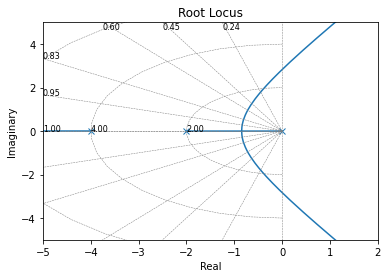

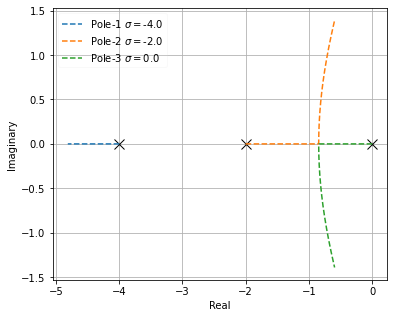

CPU times: user 2.1 s, sys: 20.2 ms, total: 2.12 s
Wall time: 2.11 s


In [8]:
%%time

sys = 1/(s*(s+2)*(s+4))
rlist, klist = \
matlab.rlocus(sys, 
              xlim=[-5, 2], ylim=[-5, 5],
              kvect=np.arange(0, 1e+1+1, 1e-3), # List of gains
              grid=True,
            )

visualize_root_locus(make_df(rlist, klist), 'Example1')

## 例題2

\begin{align}
sys = \frac{(s+3)}{s(s+1)(s+2)(s+4)}
\end{align}

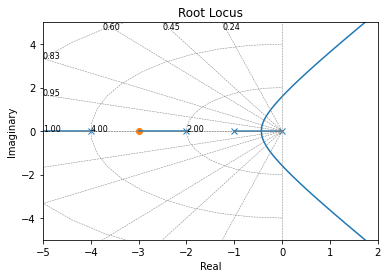

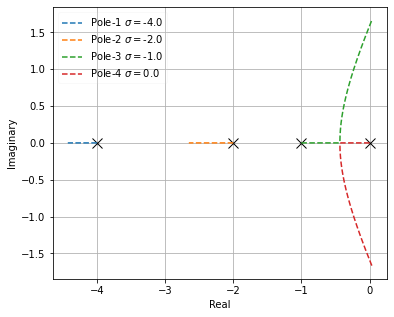

CPU times: user 2.17 s, sys: 0 ns, total: 2.17 s
Wall time: 2.17 s


In [9]:
%%time

sys = (s+3)/(s*(s+1)*(s+2)*(s+4))
rlist, klist = \
matlab.rlocus(sys, 
              xlim=[-5, 2], ylim=[-5, 5],
              kvect=np.arange(0, 1e+1+1, 1e-3), # List of gains
              grid=True,
            )

visualize_root_locus(make_df(rlist, klist), 'Example2')

## 例題3

\begin{align}
sys = \frac{(s^2-4s+20)}{(s+2)(s+4)}
\end{align}

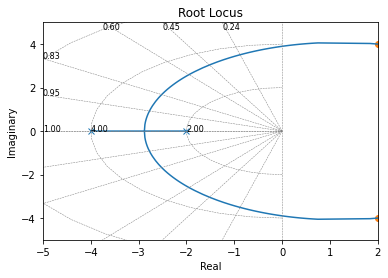

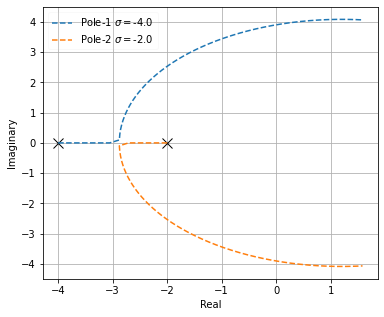

CPU times: user 1.38 s, sys: 20.2 ms, total: 1.4 s
Wall time: 1.39 s


In [10]:
%%time

sys = (s**2-4*s+20)/((s+2)*(s+4))
rlist, klist = \
matlab.rlocus(sys, 
              xlim=[-5, 2], ylim=[-5, 5],
              kvect=np.arange(0, 1e+1+1, 1e-3), # List of gains
              grid=True,
            )
df = make_df(rlist, klist)

visualize_root_locus(df, 'Example3')

-75.96375653207353